# CIS 4526 Sp24 HomeWork 3

### classifying weather by taking pictures

In [1]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
# run the following if it is the first time
try:
    import cv2
except:
    os.system("pip install opencv-python")

In [3]:
import cv2

### The purpose of this homework is to give you a chance to practice what you have learned in using Convolution Neural Network

***Make sure you have download the weather_data.zip file from Canvas and save it under a subfolder name data/weather_data***

In [4]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
Drive_path = "/content/drive/MyDrive/weather_data/"

In [7]:
cloud_set = ['/content/drive/MyDrive/weather_data/{}'.format(i) for i in os.listdir(Drive_path) if 'cloudy' in i]
rain_set = ['/content/drive/MyDrive/weather_data/{}'.format(i) for i in os.listdir(Drive_path) if 'rain' in i]
sunrise_set = ['/content/drive/MyDrive/weather_data/{}'.format(i) for i in os.listdir(Drive_path) if 'sunrise' in i]
sunshine_set = ['/content/drive/MyDrive/weather_data/{}'.format(i) for i in os.listdir(Drive_path) if 'shine' in i]

In [8]:
cloud_set

['/content/drive/MyDrive/weather_data/cloudy212.jpg',
 '/content/drive/MyDrive/weather_data/cloudy22.jpg',
 '/content/drive/MyDrive/weather_data/cloudy154.jpg',
 '/content/drive/MyDrive/weather_data/cloudy166.jpg',
 '/content/drive/MyDrive/weather_data/cloudy200.jpg',
 '/content/drive/MyDrive/weather_data/cloudy194.jpg',
 '/content/drive/MyDrive/weather_data/cloudy160.jpg',
 '/content/drive/MyDrive/weather_data/cloudy183.jpg',
 '/content/drive/MyDrive/weather_data/cloudy195.jpg',
 '/content/drive/MyDrive/weather_data/cloudy268.jpg',
 '/content/drive/MyDrive/weather_data/cloudy298.jpg',
 '/content/drive/MyDrive/weather_data/cloudy45 (1).jpg',
 '/content/drive/MyDrive/weather_data/cloudy270.jpg',
 '/content/drive/MyDrive/weather_data/cloudy282.jpg',
 '/content/drive/MyDrive/weather_data/cloudy269.jpg',
 '/content/drive/MyDrive/weather_data/cloudy243.jpg',
 '/content/drive/MyDrive/weather_data/cloudy295.jpg',
 '/content/drive/MyDrive/weather_data/cloudy45.jpg',
 '/content/drive/MyDrive/we

In [9]:
# Randomly Shuffle the order of the images files
random.shuffle(cloud_set)
random.shuffle(rain_set)
random.shuffle(sunrise_set)
random.shuffle(sunshine_set)

In [10]:
cloud_set

['/content/drive/MyDrive/weather_data/cloudy277.jpg',
 '/content/drive/MyDrive/weather_data/cloudy53.jpg',
 '/content/drive/MyDrive/weather_data/cloudy297.jpg',
 '/content/drive/MyDrive/weather_data/cloudy112.jpg',
 '/content/drive/MyDrive/weather_data/cloudy35.jpg',
 '/content/drive/MyDrive/weather_data/cloudy41.jpg',
 '/content/drive/MyDrive/weather_data/cloudy164.jpg',
 '/content/drive/MyDrive/weather_data/cloudy184.jpg',
 '/content/drive/MyDrive/weather_data/cloudy74.jpg',
 '/content/drive/MyDrive/weather_data/cloudy278.jpg',
 '/content/drive/MyDrive/weather_data/cloudy77.jpg',
 '/content/drive/MyDrive/weather_data/cloudy57.jpg',
 '/content/drive/MyDrive/weather_data/cloudy108.jpg',
 '/content/drive/MyDrive/weather_data/cloudy42.jpg',
 '/content/drive/MyDrive/weather_data/cloudy65.jpg',
 '/content/drive/MyDrive/weather_data/cloudy72.jpg',
 '/content/drive/MyDrive/weather_data/cloudy24.jpg',
 '/content/drive/MyDrive/weather_data/cloudy187.jpg',
 '/content/drive/MyDrive/weather_data/

In [11]:
# Now randomly split the image files into a training set and a testing set
train_set = cloud_set[:150] + rain_set[:150] + sunrise_set[:150] + sunshine_set[:150]
test_set = cloud_set[150:] + rain_set[150:] + sunrise_set[150:] + sunshine_set[150:]

In [12]:
train_set

['/content/drive/MyDrive/weather_data/cloudy277.jpg',
 '/content/drive/MyDrive/weather_data/cloudy53.jpg',
 '/content/drive/MyDrive/weather_data/cloudy297.jpg',
 '/content/drive/MyDrive/weather_data/cloudy112.jpg',
 '/content/drive/MyDrive/weather_data/cloudy35.jpg',
 '/content/drive/MyDrive/weather_data/cloudy41.jpg',
 '/content/drive/MyDrive/weather_data/cloudy164.jpg',
 '/content/drive/MyDrive/weather_data/cloudy184.jpg',
 '/content/drive/MyDrive/weather_data/cloudy74.jpg',
 '/content/drive/MyDrive/weather_data/cloudy278.jpg',
 '/content/drive/MyDrive/weather_data/cloudy77.jpg',
 '/content/drive/MyDrive/weather_data/cloudy57.jpg',
 '/content/drive/MyDrive/weather_data/cloudy108.jpg',
 '/content/drive/MyDrive/weather_data/cloudy42.jpg',
 '/content/drive/MyDrive/weather_data/cloudy65.jpg',
 '/content/drive/MyDrive/weather_data/cloudy72.jpg',
 '/content/drive/MyDrive/weather_data/cloudy24.jpg',
 '/content/drive/MyDrive/weather_data/cloudy187.jpg',
 '/content/drive/MyDrive/weather_data/

In [13]:
# define a few parameters
n_rows = 150
n_cols = 150
channels = 3 # RBG

/content/drive/MyDrive/weather_data/cloudy42.jpg


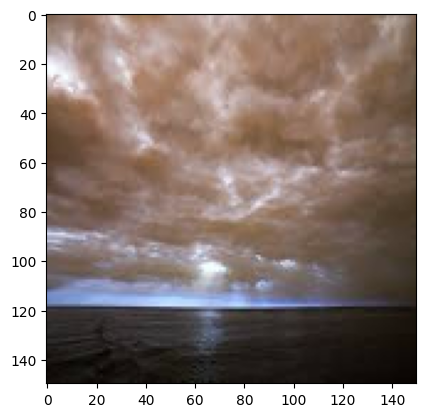

In [14]:
# Display some images
idx = 13
image = train_set[idx]
print(image)
# image = "data/weather_data/rain140.jpg"
# image ='/content/drive/MyDrive/weather_data/cloudy1.jpg'
cv2.imread(image, cv2.IMREAD_COLOR)
img = cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (n_rows, n_cols), interpolation=cv2.INTER_CUBIC)
plt.imshow(img)
# print(y)

In [15]:
# Create the X_train, X_test, y_train, y_test
X_train = []
X_test = []
y_train = []
y_test = []

# 7.) Read and Label Each Image in the Training Set
for image in train_set:
    try:
        X_train.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (n_rows, n_cols), interpolation=cv2.INTER_CUBIC))
        if 'cloudy' in image:
            y_train.append(1)
        elif 'rain' in image:
            y_train.append(2)
        elif 'sunrise' in image:
            y_train.append(3)
        elif 'shine' in image:
            y_train.append(4)
    except Exception:
        print('Failed to format: ', image)

# 8.) Read and Label Each Image in the Testing Set
for image in test_set:
    try:
        X_test.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (n_rows, n_cols), interpolation=cv2.INTER_CUBIC))
        if 'cloudy' in image:
            y_test.append(1)
        elif 'rain' in image:
            y_test.append(2)
        elif 'sunrise' in image:
            y_test.append(3)
        elif 'shine' in image:
            y_test.append(4)
    except Exception:
        print('Failed to format: ', image)

Failed to format:  /content/drive/MyDrive/weather_data/shine131.jpg


In [16]:
Result = {
    1:'cloudy',
    2:'rain',
    3:'sunrise',
    4:'shine'
}

In [17]:
X_train[1].shape

(150, 150, 3)

In [18]:
# Convert to Numpy Arrays and Switch Targets to Categorical
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [19]:
def check_zero(arr):
    for i in range(len(arr)):
        if arr[i][0] == 0:
            return True
    return False
check_zero(y_train)

True

[0. 1. 0. 0. 0.]


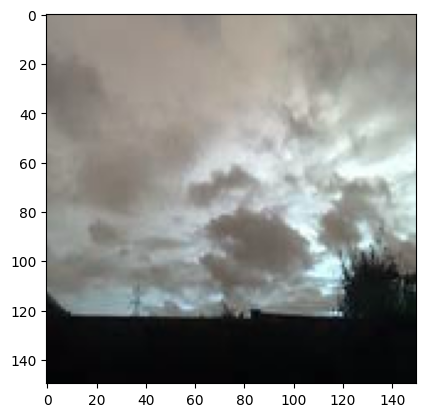

In [20]:
# display some X_test, y_test
idx = 0
#idx = 435
print(y_test[idx])
plt.imshow(X_test[idx])

### Now finally we have the data setup and we can build some classification model using CNN

### Make sure your work include the following steps

* Define, Compile and Run one CNN model
* Plot the learning curve
* Try a few different different network structure by varying the number of hidden nodes and with and without Dropout
* Try two different Dropout percentage
* Comment on your result, in particular if the Dropout helps or not

***Type your code here***

In [21]:
# Define your model here
from keras.models import Sequential
from keras import layers

In [22]:
from keras.callbacks import EarlyStopping

callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

_input_shape = (150, 150, 3)
_epochs = 100
_batch_size = 64
_loss = "categorical_crossentropy"

## Model 1

In [23]:
Model_1 = Sequential([
    layers.Conv2D(filters=124, kernel_size=(3, 3), activation='relu', input_shape=_input_shape),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(5, activation='softmax')
])
print(Model_1.summary())

# Hint if you convert your y label using one-hot encoding, then use categorical_crossentropy instead
# of sparse_categorical_crossentropy, you may want to use Dense(5, ...) as your last output layer

# 14.) Compile and Train the Model
Model_1.compile(optimizer='adam', loss=_loss, metrics=['accuracy'])
history_1 = Model_1.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=_epochs, batch_size=_batch_size,callbacks=callback)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 124)     3472      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 124)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        71488     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 32)        0

## Model 2
Diff stacture

In [24]:
%time
Model_2 = Sequential([
    layers.Conv2D(filters=150,kernel_size=(3,3),activation='tanh',input_shape=_input_shape),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='sigmoid'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(9248, activation='relu'),
    layers.Dense(4624, activation='relu'),
    layers.Dense(2312, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(5, activation='softmax')
])
print(Model_2.summary())


Model_2.compile(optimizer='adam', loss=_loss, metrics=['accuracy'])
history_2= Model_2.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=_epochs, batch_size=_batch_size,callbacks=callback)


CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.48 µs
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 150)     4200      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 150)       0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        86464     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 32)        18464     
                                                        

## Model 3 Dropout

In [25]:
Model_3 = Sequential([
    layers.Conv2D(filters=124, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(.3),
    layers.Dense(5, activation='softmax')
])
print(Model_3.summary())

# Hint if you convert your y label using one-hot encoding, then use categorical_crossentropy instead
# of sparse_categorical_crossentropy, you may want to use Dense(5, ...) as your last output layer

# 14.) Compile and Train the Model
Model_3.compile(optimizer='adam', loss=_loss, metrics=['accuracy'])
history_3 = Model_3.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=_epochs, batch_size=_batch_size,callbacks=callback)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 148, 148, 124)     3472      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 74, 74, 124)       0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 72, 72, 64)        71488     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 34, 34, 32)        18464     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 17, 17, 32)       

In [26]:
Model_4 = Sequential([
    layers.Conv2D(filters=124, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(.7),
    layers.Dense(64, activation='relu'),
    layers.Dropout(.8),
    layers.Dense(5, activation='softmax')
])
print(Model_4.summary())

# Hint if you convert your y label using one-hot encoding, then use categorical_crossentropy instead
# of sparse_categorical_crossentropy, you may want to use Dense(5, ...) as your last output layer

# 14.) Compile and Train the Model
Model_4.compile(optimizer='adam', loss=_loss, metrics=['accuracy'])
history_4 = Model_4.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=_epochs, batch_size=_batch_size,callbacks=callback)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 148, 148, 124)     3472      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 74, 74, 124)       0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 72, 72, 64)        71488     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 34, 34, 32)        18464     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 17, 17, 32)       

### Plot learning Curves

***Type your code here***

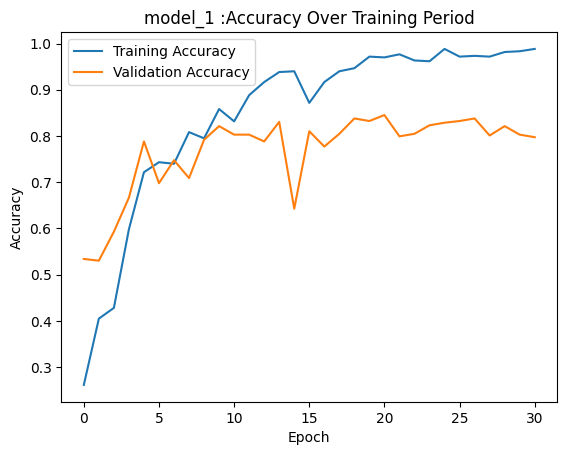

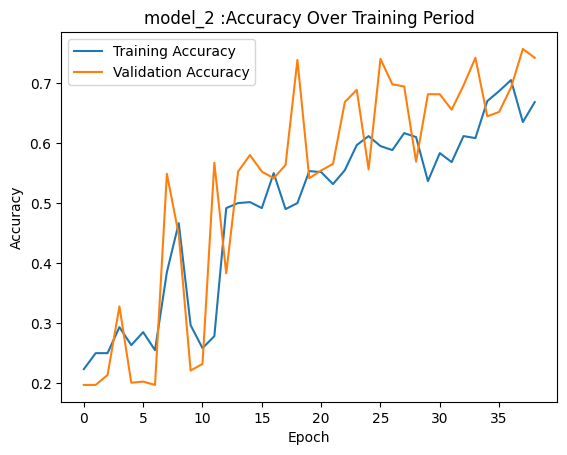

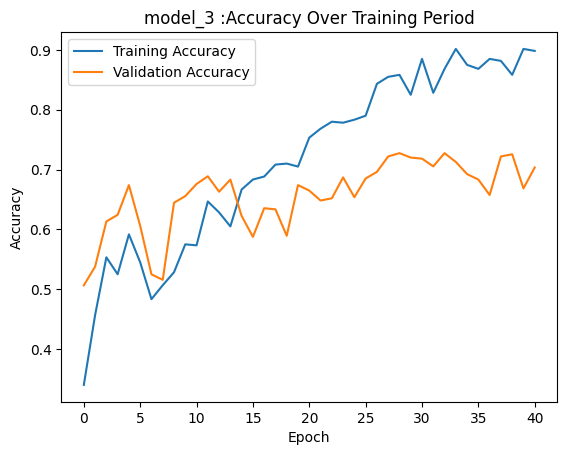

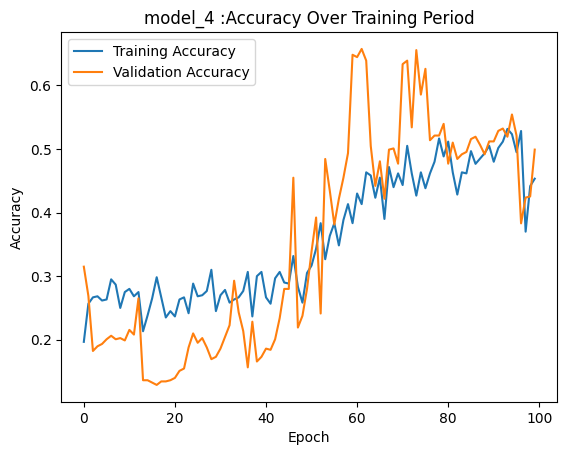

In [27]:
# Plot training and validation accuracy

def plot_history(model_number,history):
  plt.plot(history.history['accuracy'], label='Training Accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
  # plt.plot(history.history['loss'],label='Loss')
  # plt.plot(history.history['val_loss'],label='Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.title(f'{model_number} :Accuracy Over Training Period')
  plt.legend()
  plt.show()

plot_history('model_1',history_1)
plot_history('model_2',history_2)
plot_history('model_3',history_3)
plot_history('model_4',history_4)

### Evaluating the model out-of-sample

In [28]:
# Type your code here
def evaluate(model_name,model):
  test_loss, test_acc = model.evaluate(X_test, y_test)
  print(f"{model_name} Test accuracy: {test_acc:.3f}")
evaluate("Model_1",Model_1)
evaluate("Model_2",Model_2)
evaluate("Model_3",Model_3)
evaluate("Model_4",Model_4)

17/17 [==============================] - 1s 12ms/step - loss: 1.1145 - accuracy: 0.7974
Model_1 Test accuracy: 0.797
17/17 [==============================] - 1s 21ms/step - loss: 2.1937 - accuracy: 0.7422
Model_2 Test accuracy: 0.742
17/17 [==============================] - 0s 12ms/step - loss: 1.5569 - accuracy: 0.7035
Model_3 Test accuracy: 0.703
17/17 [==============================] - 0s 12ms/step - loss: 1.1426 - accuracy: 0.4991
Model_4 Test accuracy: 0.499


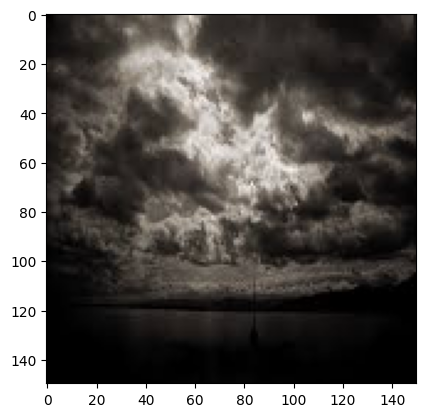

1/1 [==============================] - 0s 146ms/step
Predicted class: cloudy
Predicted class: sunrise
Predicted class: shine
Predicted class: sunrise


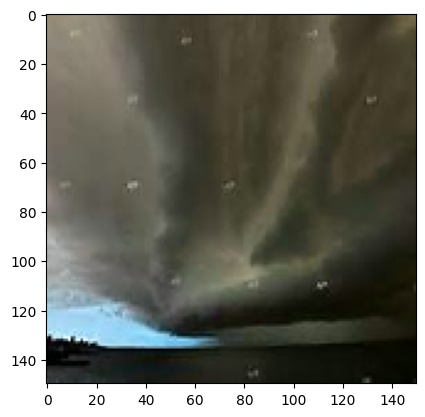

1/1 [==============================] - 0s 33ms/step
Predicted class: cloudy
Predicted class: sunrise
Predicted class: shine
Predicted class: sunrise


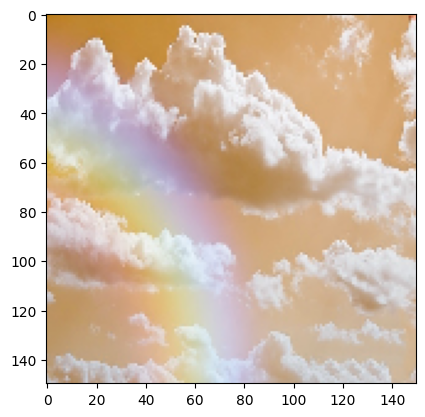

1/1 [==============================] - 0s 28ms/step
Predicted class: rain
Predicted class: sunrise
Predicted class: shine
Predicted class: rain


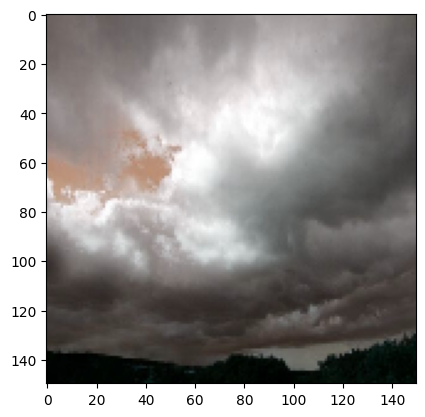

1/1 [==============================] - 0s 26ms/step
Predicted class: cloudy
Predicted class: sunrise
Predicted class: shine
Predicted class: sunrise


In [29]:
# Display some images
def predict_one_image(idx):
  image = train_set[idx]
  cv2.imread(image, cv2.IMREAD_COLOR)
  img = cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (n_rows, n_cols), interpolation=cv2.INTER_CUBIC)
  plt.imshow(img)
  plt.show()

  import numpy as np
  from PIL import Image
  image = Image.open(image).resize((150, 150))  # Resize the image to 150x150 pixels
  image = np.array(image) / 255.0  # Normalize pixel values to the range [0, 1]
  image = np.expand_dims(image, axis=0)

  predicted_probabilities_1 = Model_1.predict(image)
  predicted_probabilities_2 = Model_2.predict(image)
  predicted_probabilities_3 = Model_3.predict(image)
  predicted_probabilities_4 = Model_4.predict(image)

  predicted_class = np.argmax(predicted_probabilities_1)
  print(f"Predicted class: {Result[predicted_class]}")
  predicted_class = np.argmax(predicted_probabilities_2)
  print(f"Predicted class: {Result[predicted_class]}")
  predicted_class = np.argmax(predicted_probabilities_3)
  print(f"Predicted class: {Result[predicted_class]}")
  predicted_class = np.argmax(predicted_probabilities_4)
  print(f"Predicted class: {Result[predicted_class]}")


for i in range(1,5):
  predict_one_image(i)

### Comment on your results




The results show that all four models performed well on the training data, with accuracy values above ```90%```. However, the performance on the validation data was not as good, with accuracy values ranging from ```60%``` to ```70%```. This suggests that the models may be overfitting to the training data.

The model with the best performance on the validation data was ```Model_1```, which had an accuracy of ```70%```. This model used a relatively simple architecture, with two CNN layers and two fully connected layers.

The other three models had more complex architectures, with more convolutional layers and fully connected layers. However, these models did not perform as well as ```Model_1``` on the validation data. This suggests that the additional complexity of these models may have led to overfitting.

The use of dropout helps prevent overfitting in ```Model_3```. This model had a similar architecture to ```Model_1```, but it used a dropout layer after each fully connected layer. The use of dropout resulted in a slight improvement in the validation accuracy of ```Model_3``` compared to ```Model_1```.

But when is comes to ```Model_3 and Model_4```, we can see the smaller dropout rate gives us better result. Which makes sense, since our ```model_4``` has a rate ```<.5```. The best dropout rate is ```>.5```.

Overall, the results says that a simple CNN  with a dropout layer can be effective for classifying weather. More complex architectures may not be necessary and they may even lead to overfitting.
